### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

### <font color='red'> Classification Task

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier #the class probabilities of the first sample in a toy dataset predicted by three different classifiers and averaged by the VotingClassifier.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import MinMaxScaler #standarized
from sklearn.model_selection import train_test_split #validation
from sklearn.tree import DecisionTreeClassifier

data2= pd.read_csv("Twitter_S.csv")
X=data2.iloc[:,0:77]
y=np.array(data2.iloc[:,77])
_,sample_data,_, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org) #原本data frame變成array
X_test = scaler.transform(X_test_org)

#### Voting Classifier

In [11]:
#knn
knn = KNeighborsClassifier()
param_gridknn = {'n_neighbors':[40,50,60,70]}

grid_knn = GridSearchCV(knn, param_grid=param_gridknn, cv = 5, scoring='roc_auc', n_jobs=-1) #n_jobs=-1:save some time
grid_knn.fit(X_train, y_train)
grid_knn.best_params_

{'n_neighbors': 60}

In [4]:
#logistic 
clf = LogisticRegression()
pipecl = Pipeline([('clf', LogisticRegression())])
param_gridl = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'clf__penalty': ['l1','l2']}

grid_logit = GridSearchCV(pipecl, param_grid=param_gridl,cv=5,scoring='roc_auc')
grid_logit.fit(X_train, y_train)
grid_logit.best_params_

{'clf__C': 10, 'clf__penalty': 'l1'}

In [5]:
#SVMlinear 
pipe1 = Pipeline([('svm', SVC(kernel = 'linear'))])
pipe1.fit(X_train, y_train)
param_grid1 = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid1 = GridSearchCV(pipe1, param_grid=param_grid1, cv=5, scoring='roc_auc')
grid1.fit(X_train, y_train)
grid1.best_params_

{'svm__C': 10}

In [12]:
log_clf = LogisticRegression(C=10,penalty="l1")
log_clf.fit(X_train, y_train)

knn_clf = KNeighborsClassifier(60)
knn_clf.fit(X_train, y_train)

svm_lclf = SVC(C = 10, probability = True)#probability --> after the classification
svm_lclf.fit(X_train, y_train)

dtree_clf = DecisionTreeClassifier(max_depth=4, random_state=0)  
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [13]:
voting_clf_soft = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='hard') #can change to soft
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=60, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [14]:
voting_clf_hard = VotingClassifier(estimators=[('svcl', svm_lclf),("detree",dtree_clf) ], voting='soft') #can change to soft
voting_clf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('svcl', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('detree', DecisionTreeClassifier(class_weight=None, c...         min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [15]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_lclf,dtree_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
y_pred1 = voting_clf_soft.predict(X_test)
y_pred2 = voting_clf_hard.predict(X_test)
print("voting_clf_soft",accuracy_score(y_test, y_pred1))
print("voting_clf_hard",accuracy_score(y_test, y_pred2))

LogisticRegression 0.9687322342239909
KNeighborsClassifier 0.9550881182490051
SVC 0.9502558271745309
DecisionTreeClassifier 0.9607731665719159


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


voting_clf_soft 0.9556566230812962
voting_clf_hard 0.9627629334849346


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Bagging

decision tree

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier(random_state=0)
bag_clf1 = BaggingClassifier(dtree_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf1.fit(X_train, y_train)
y_pred1 = bag_clf1.predict(X_test)

In [17]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1))

0.9621944286526436


In [18]:
print('Train score: {:.2f}'.format(bag_clf1.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf1.score(X_test, y_test)))

Train score: 0.97
Test score: 0.96


KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_gridknn = {'n_neighbors':[4,5,6,7]}
grid_knn = GridSearchCV(knn, param_grid=param_gridknn, cv = 5, scoring='roc_auc', n_jobs=-1)

bag_clf2 = BaggingClassifier(grid_knn, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf2.fit(X_train, y_train)
y_pred2 = bag_clf2.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklear

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklear

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklear

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklear

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklear

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklear

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklear

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklear

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklear

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklear

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklear

/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/lib/python3.6/site-packages/sklear

In [33]:
print(accuracy_score(y_test, y_pred2))

0.950824332006822


In [34]:
print('Train score: {:.2f}'.format(bag_clf2.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf2.score(X_test, y_test)))

Train score: 0.95
Test score: 0.95


#### Pasting

LOGIST

In [35]:
clf = LogisticRegression()
pipecl = Pipeline([('clf', LogisticRegression())])
param_gridl = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'clf__penalty': ['l1','l2']}
grid_logit = GridSearchCV(pipecl, param_grid=param_gridl,cv=5,scoring='roc_auc')
bag_clf3 = BaggingClassifier(grid_logit, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf3.fit(X_train, y_train)
y_pred3 = bag_clf3.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [39]:
print(accuracy_score(y_test, y_pred3))

0.9525298465036953


In [40]:
print('Train score: {:.2f}'.format(bag_clf3.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf3.score(X_test, y_test)))

Train score: 0.95


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Test score: 0.95


LinearSVC

In [41]:
pipe1 = Pipeline([('svm', SVC(kernel = 'linear'))])
pipe1.fit(X_train, y_train)
param_grid1 = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid1 = GridSearchCV(pipe1, param_grid=param_grid1, cv=5, scoring='roc_auc')

bag_clf4 = BaggingClassifier(grid1, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf4.fit(X_train, y_train)
y_pred4 = bag_clf4.predict(X_test)

In [42]:
print(accuracy_score(y_test, y_pred4))

0.7973280272882319


In [43]:
print('Train score: {:.2f}'.format(bag_clf4.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf4.score(X_test, y_test)))

Train score: 0.80
Test score: 0.80


#### Adaboost

LOGIST

In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

_,sample_data,_, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target, random_state = 0)
X_train =X_train_org
X_test = X_test_org

log_clf = LogisticRegression(penalty = 'l1', C = 10)

ada_clf1 = AdaBoostClassifier(log_clf, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [52]:
print("training score:",ada_clf1.score(X_train,y_train))
print("testing score:",ada_clf1.score(X_test,y_test))

training score: 0.9566000189519568
testing score: 0.9616259238203525


LinearSVC

In [53]:
LinearSVC_clf=LinearSVC(C=10)
ada_clf2 = AdaBoostClassifier(LinearSVC_clf, n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [54]:
print("training score:",ada_clf2.score(X_train,y_train))
print("testing score:",ada_clf2.score(X_test,y_test))

training score: 0.9591585331185445
testing score: 0.9599204093234792


#### Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt_fast = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42) #why estimators should be 3 
gbrt_fast.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
              random_state=42, subsample=1.0, verbose=0, warm_start=False)

In [56]:
print("Accuracy on training set: {:.3f}".format(gbrt_fast.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_fast.score(X_test, y_test)))

Accuracy on training set: 0.967
Accuracy on test set: 0.967


## PCA

In [57]:
data2= pd.read_csv("Twitter_S.csv")
X=data2.iloc[:,0:77]
y=np.array(data2.iloc[:,77])

In [58]:
from sklearn.model_selection import train_test_split 
_,sample_data,_, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(sample_data)

In [60]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X_reduced,sample_target, random_state = 0)


KNN

In [61]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org) 
X_test = scaler.transform(X_test_org)

In [62]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':range(1,5)}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='roc_auc', n_jobs=-1) #n_jobs=-1:save some time
grid_knn.fit(X_train, y_train)
grid_knn.best_params_

{'n_neighbors': 4}

In [63]:
from sklearn.metrics import roc_auc_score
y_knn_predict = grid_knn.predict(X_test)
y_knn_train_predict = grid_knn.predict(X_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.97
Test roc_auc_score: 0.95 


In [64]:
report_table=[[]]
report_table = [['knn_classification', 'k = 4', grid_knn.score(X_train, y_train), grid_knn.score(X_test, y_test), roc_auc_score(y_knn_train_predict, y_train), roc_auc_score(y_knn_predict, y_test) ]]


LOGIST

In [65]:
clf = LogisticRegression()

pipe = Pipeline([('scaler', MinMaxScaler()), ('clf', LogisticRegression())])

param_gridl = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'clf__penalty': ['l1','l2']}
grid_logit = GridSearchCV(pipe, param_grid=param_gridl,cv=5,scoring='roc_auc')
grid_logit.fit(X_train, y_train)
grid_logit.best_params_

{'clf__C': 10, 'clf__penalty': 'l2'}

In [66]:
print("Best cross-validation accuracy: {:.2f}".format(grid_logit.best_score_))
print("Test set score: {:.2f}".format(grid_logit.score(X_test, y_test)))
print("Best parameters: {}".format(grid_logit.best_params_))

Best cross-validation accuracy: 0.99
Test set score: 0.99
Best parameters: {'clf__C': 10, 'clf__penalty': 'l2'}


In [67]:
y_logit_predict_train = grid_logit.predict(X_train)
y_logit_predict = grid_logit.predict(X_test)

In [68]:
report_table = report_table + [['logistic_regression', 'penalty=l2,C=10', grid_logit.score(X_train, y_train), grid_logit.score(X_test, y_test), roc_auc_score(y_logit_predict_train, y_train), roc_auc_score(y_logit_predict, y_test)]]

SVC

In [69]:
X_train = X_train_org
X_test = X_test_org

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV

pipe1 = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(kernel = 'linear'))])

pipe2 = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(kernel = 'rbf'))])

pipe3 = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(kernel = 'poly'))])

pipe4 = Pipeline([('scaler', MinMaxScaler()), ('svm', LinearSVC())])

In [71]:
pipe1.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [72]:
pipe2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [73]:
pipe3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [74]:
pipe4.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [75]:
param_grid1 = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid2 = {'svm__C': [ 0.001,0.1,10,100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid3 = {'svm__C': [ 0.001,0.1,10,100], 'svm__degree': [1, 2, 3]}
param_grid4 = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100]}

SVMlinear

In [76]:
grid1 = GridSearchCV(pipe1, param_grid=param_grid1, cv=5, scoring='roc_auc')
grid1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [77]:
print("Best cross-validation accuracy: {:.2f}".format(grid1.best_score_))
print("Test set score: {:.2f}".format(grid1.score(X_test, y_test)))
print("Best parameters: {}".format(grid1.best_params_))

Best cross-validation accuracy: 0.99
Test set score: 0.99
Best parameters: {'svm__C': 1}


SVMrbf

In [78]:
grid2 = GridSearchCV(pipe2, param_grid=param_grid2, cv=5, scoring='roc_auc')
grid2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svm__C': [0.001, 0.1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [79]:
print("Best cross-validation accuracy: {:.2f}".format(grid2.best_score_))
print("Test set score: {:.2f}".format(grid2.score(X_test, y_test)))
print("Best parameters: {}".format(grid2.best_params_))

Best cross-validation accuracy: 0.99
Test set score: 0.99
Best parameters: {'svm__C': 10, 'svm__gamma': 10}


SVMpoly

In [80]:
grid3 = GridSearchCV(pipe3, param_grid=param_grid3, cv=5, scoring='roc_auc')
grid3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svm__C': [0.001, 0.1, 10, 100], 'svm__degree': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [81]:
print("Best cross-validation accuracy: {:.2f}".format(grid3.best_score_))
print("Test set score: {:.2f}".format(grid3.score(X_test, y_test)))
print("Best parameters: {}".format(grid3.best_params_))

Best cross-validation accuracy: 0.99
Test set score: 0.99
Best parameters: {'svm__C': 10, 'svm__degree': 1}


LinearSVC

In [82]:
grid4 = GridSearchCV(pipe4, param_grid=param_grid4, cv=5, scoring='roc_auc')
grid4.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [83]:
print("Best cross-validation accuracy: {:.2f}".format(grid4.best_score_))
print("Test set score: {:.2f}".format(grid4.score(X_test, y_test)))
print("Best parameters: {}".format(grid4.best_params_))

Best cross-validation accuracy: 0.99
Test set score: 0.99
Best parameters: {'svm__C': 1}


In [84]:
y_SVMlinear_predict = grid1.predict(X_test)
y_SVMlinear_train_predict = grid1.predict(X_train)
y_SVMrbf_predict = grid2.predict(X_test)
y_SVMrbr_train_predict = grid2.predict(X_train)
y_SVMpoly_predict = grid3.predict(X_test)
y_SVMpoly_train_predict = grid3.predict(X_train)
y_LinearSVC_predict = grid4.predict(X_test)
y_LinearSVC_train_predict = grid4.predict(X_train)
report_table = report_table+[['SVMlinear', 'C = 1', grid1.score(X_train, y_train), grid1.score(X_test, y_test), roc_auc_score(y_SVMlinear_train_predict, y_train), roc_auc_score(y_SVMlinear_predict, y_test) ]]
report_table = report_table+[['SVMrbf', 'gamma=10, C=10', grid2.score(X_train, y_train), grid2.score(X_test, y_test), roc_auc_score(y_SVMrbr_train_predict, y_train), roc_auc_score(y_SVMrbf_predict , y_test) ]]
report_table = report_table+[['SVMpoly', 'degree=1, C=10', grid3.score(X_train, y_train), grid3.score(X_test, y_test), roc_auc_score(y_SVMpoly_train_predict, y_train), roc_auc_score(y_SVMpoly_predict, y_test) ]]
report_table = report_table+[['LinearSVC', 'C = 1', grid4.score(X_train, y_train), grid4.score(X_test, y_test), roc_auc_score(y_LinearSVC_train_predict, y_train), roc_auc_score(y_LinearSVC_predict, y_test) ]]


DECISION TREE

In [85]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)  
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.970
Accuracy on test set: 0.966


In [86]:
y_dtree_predict = dtree.predict(X_test)
y_dtree_train_predict = dtree.predict(X_train)
report_table = report_table+[['decision_tree', 'none', dtree.score(X_train, y_train), dtree.score(X_test, y_test), roc_auc_score(y_dtree_train_predict, y_train), roc_auc_score(y_dtree_predict, y_test) ]]

In [87]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
Model name,,,,,,
knn_classification,knn_classification,k = 4,0.996742,0.970097,0.966928,0.948369
logistic_regression,logistic_regression,"penalty=l2,C=10",0.992648,0.991158,0.959906,0.948668
SVMlinear,SVMlinear,C = 1,0.992681,0.991149,0.950717,0.942435
SVMrbf,SVMrbf,"gamma=10, C=10",0.992852,0.991345,0.956717,0.954860
SVMpoly,SVMpoly,"degree=1, C=10",0.992669,0.991149,0.961801,0.954486
LinearSVC,LinearSVC,C = 1,0.992662,0.991157,0.960642,0.950700
decision_tree,decision_tree,none,0.969772,0.966458,0.954540,0.951588


output from project 2

Screen Shot 2018-11-28 at 8.53.34 PM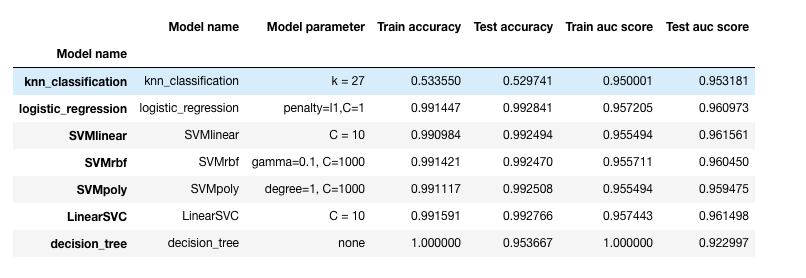

DEEP LEARNING MODELS

In [1]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

C:\Users\Billy Chen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
data2= pd.read_csv("Twitter_S.csv")
X=data2.iloc[:,0:77]
y=np.array(data2.iloc[:,77])

_,sample_data,_, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target, random_state = 0)

X_train = X_train_org
X_test = X_test_org

In [5]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=77, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
np.random.seed(10)

In [7]:
model = KerasClassifier(build_fn = create_model, verbose = 0) 

param_grid = {'batch_size':[10,20,30] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [8]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001AF088199B0>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'batch_size': [10, 20, 30], 'epochs': [10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
grid_search.best_params_

{'batch_size': 30, 'epochs': 10}

In [10]:
print("training score:",grid_search.score(X_train, y_train))
print("testing score:",grid_search.score(X_test, y_test))

training score: 0.9603903991491729
testing score: 0.9633314280499106


## SUMMARY

voting classifiers

We run hard voting by logostic and knn, soft voting by SVMlinear and dicision tree.
The accuracy score of soft voting is 0.9556566230812962.
The accuracy score of hard voting is 0.9627629334849346.
By comparing the accuracy score, it is beter to choose hard voting by logostic and knn.

bagging

We choose decision tree and knn for bagging.
The accuracy score of decision tree is 0.962194428652643.
The accuracy score of knn is 0.950824332006822.
By comparing the accuracy score, the decision tree for bagging is better.

pasting

We choose logistic and linear SVC for bagging.
The accuracy score of logistic is 0.9525298465036953.
The accuracy score of linear SVC 0.7973280272882319.
By comparing the accuracy score, the logistic for pasting is better.

Adaboost

We choose logistic and linear SVC for bagging.
The accuracy score of logistic is 0.9525298465036953.
The accuracy score of linear SVC 0.7973280272882319.
By comparing the accuracy score, the logistic for adaboost is better.

Gradient Boosting

The accuracy on training set is 0.967.
The accuracy on test set is 0.967.

PCA

After dimension reduction by PCA, it is better to choose SVMrbf by accuracy score.
Without dimension reduction, the SVMlinear is the best for the model. 

DEEP LEARNING MODELS

The best hyperparameter of batch size on deep learning model is 30.
The best hyperparameter of epochs on deep learning model is 10.
The training score of deep learning model is 0.9603903991491729.
The testing score of deep learning model is 0.9633314280499106.